## STDs of embedding space

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pickle
import os
import torch

In [35]:
datasets = {"cross", "caida", "cicids", "cicapt", "mawi"}
models = {
    "yatc": "blue",
    "etbert": "red",
    "netfound": "violet",
    "netmamba": "green",
}

result = {
    key: {k: None for k in models}
    for key in datasets
}

In [43]:
def plot(array, label, color, ax):
    dims = np.linspace(0, 1, array.shape[0])
    ax.plot(dims, array, label=label, color=color)
    ax.set_xlabel('Dimensions index')
    ax.legend()


def transform(x):
    return MinMaxScaler().fit_transform(np.sort(np.std(x.numpy(), axis=0)).reshape(-1, 1))

def process(filepath):
    with open(filepath, "rb") as f:
        embeddings, _ = pickle.load(f)

    for key in datasets:
        if key in filepath:
            return key, embeddings

    raise Exception

In [ ]:
for model in models:
    directory = f'../data/{model}/'
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        dataset, embeddings = process(filepath)
        result[dataset][model] = embeddings

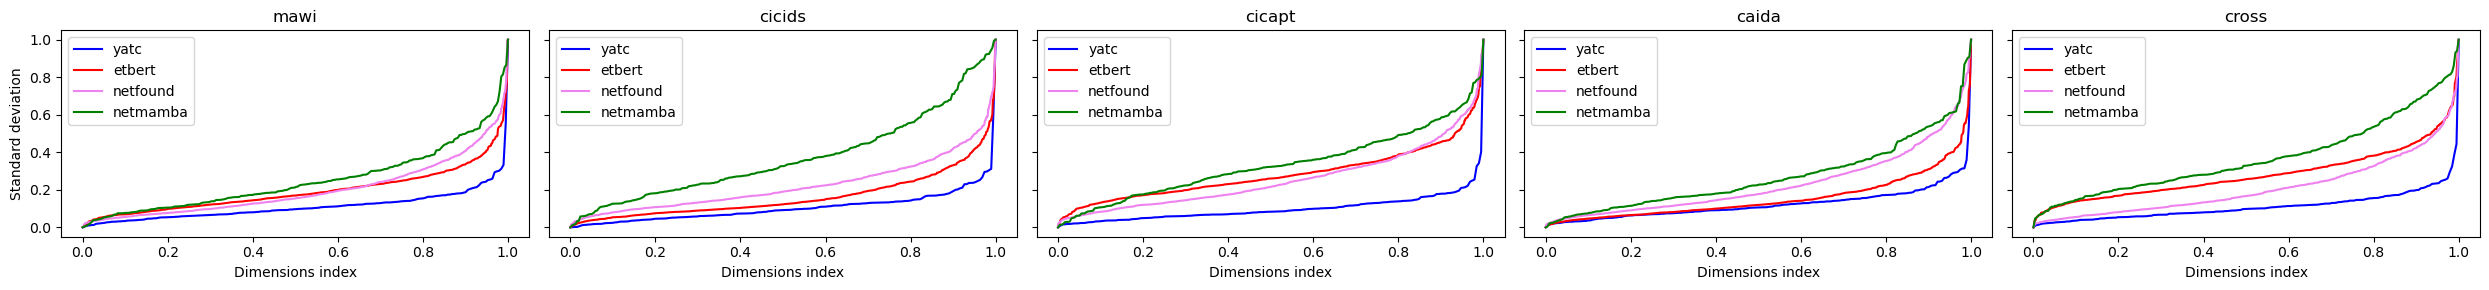

In [46]:
fig, axes = plt.subplots(1, 5, figsize=(25, 3), sharey=True)

for ax, dataset in zip(axes, datasets):
    ax.set_title(dataset)
    for model in models:
        plot(transform(result[dataset][model]), model, color=models[model], ax=ax)

axes[0].set_ylabel('Standard deviation')  # set ylabel only on first subplot

plt.tight_layout()
plt.show()